In [1]:
import os
import angr
import monkeyhex
from tqdm.notebook import tqdm

import networkx as nx
import scipy as sp
import numpy as np

import pickle

import matplotlib.pyplot as plt
import pprint

In [2]:
utilnames=["cat","chgrp","chmod","chown","cp","date","dd","df","dmesg","echo","false","hostname","kill","ln","login","ls","mkdir","mknod","more","mount","mv","ps","pwd","rm","rmdir","sed","sh","stty","su","sync","true","umount","uname","Utility","to","print","system","information"]

In [3]:
def get_cfg_nx(path, **kwargs):
    try:
        proj = angr.Project(path,
                          load_options={'auto_load_libs': False})
    except:
        return 0

    tqdm.write(proj.filename)
    cfg = proj.analyses.CFGFast()
    tqdm.write("%d nodes, %d edges" % (len(cfg.graph.nodes()), len(cfg.graph.edges())))
    G = cfg.graph
    return G

#include <stdio.h>
int main() {
   // printf() displays the string inside quotation
   printf("Hello, World!");
   int hello = 1;
   if (hello == 1){
   	return 0;
   } else {
	return 1;
   }
}


WARNING | 2021-05-06 01:09:32,270 | cle.loader | The main binary is a position-independent executable. It is being loaded with a base address of 0x400000.
WARNING | 2021-05-06 01:09:32,273 | angr.analyses.cfg.cfg_base | _is_region_extremely_sparse: The given region 0x4011d4-0x4011dd is not a continuous memory region in the memory space. Only the first 9 bytes (0x4011d4-0x4011dc) are processed.


./hello_world
52 nodes, 59 edges


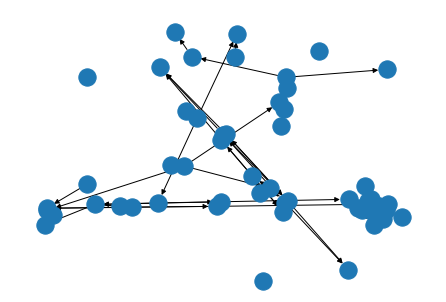

In [21]:
!cat ./hello_world.c
G = get_cfg_nx('./hello_world')
nx.draw(G)

In [4]:
"""
collect laplacians
"""

Data = {}

for uname in tqdm(utilnames):
    path = '/bin/'+uname
    G = get_cfg_nx(path)
    if G:
        c = nx.directed_laplacian_matrix(G) 
        with open('./cfgs/'+uname+'.npy', 'wb') as f:
            np.save(f,c)
        Data[uname] = c

WARNING | 2021-05-05 23:55:35,271 | cle.loader | The main binary is a position-independent executable. It is being loaded with a base address of 0x400000.
WARNING | 2021-05-05 23:55:35,278 | angr.analyses.cfg.cfg_base | _is_region_extremely_sparse: The given region 0x406180-0x406189 is not a continuous memory region in the memory space. Only the first 9 bytes (0x406180-0x406188) are processed.


/bin/cat
1313 nodes, 2186 edges


WARNING | 2021-05-05 23:55:36,339 | cle.loader | The main binary is a position-independent executable. It is being loaded with a base address of 0x400000.
WARNING | 2021-05-05 23:55:36,346 | angr.analyses.cfg.cfg_base | _is_region_extremely_sparse: The given region 0x40abf0-0x40abf9 is not a continuous memory region in the memory space. Only the first 9 bytes (0x40abf0-0x40abf8) are processed.


/bin/chgrp
3026 nodes, 5218 edges


WARNING | 2021-05-05 23:55:39,334 | cle.loader | The main binary is a position-independent executable. It is being loaded with a base address of 0x400000.
WARNING | 2021-05-05 23:55:39,340 | angr.analyses.cfg.cfg_base | _is_region_extremely_sparse: The given region 0x40a560-0x40a569 is not a continuous memory region in the memory space. Only the first 9 bytes (0x40a560-0x40a568) are processed.


/bin/chmod
2821 nodes, 4865 edges


WARNING | 2021-05-05 23:55:42,473 | cle.loader | The main binary is a position-independent executable. It is being loaded with a base address of 0x400000.
WARNING | 2021-05-05 23:55:42,480 | angr.analyses.cfg.cfg_base | _is_region_extremely_sparse: The given region 0x40b0c0-0x40b0c9 is not a continuous memory region in the memory space. Only the first 9 bytes (0x40b0c0-0x40b0c8) are processed.


/bin/chown
3138 nodes, 5434 edges


WARNING | 2021-05-05 23:55:45,733 | cle.loader | The main binary is a position-independent executable. It is being loaded with a base address of 0x400000.
WARNING | 2021-05-05 23:55:45,744 | angr.analyses.cfg.cfg_base | _is_region_extremely_sparse: The given region 0x41a5b0-0x41a5b9 is not a continuous memory region in the memory space. Only the first 9 bytes (0x41a5b0-0x41a5b8) are processed.


/bin/cp
7151 nodes, 12848 edges


WARNING | 2021-05-05 23:55:57,433 | cle.loader | The main binary is a position-independent executable. It is being loaded with a base address of 0x400000.
WARNING | 2021-05-05 23:55:57,441 | angr.analyses.cfg.cfg_base | _is_region_extremely_sparse: The given region 0x412850-0x412859 is not a continuous memory region in the memory space. Only the first 9 bytes (0x412850-0x412858) are processed.


/bin/date
4109 nodes, 7467 edges


WARNING | 2021-05-05 23:56:02,649 | cle.backends.externs | Symbol was allocated without a known size; emulation may fail if it is used non-opaquely: opterr
WARNING | 2021-05-05 23:56:02,651 | cle.loader | The main binary is a position-independent executable. It is being loaded with a base address of 0x400000.
WARNING | 2021-05-05 23:56:02,651 | cle.loader | For more information about "Symbol was allocated without a known size", see https://docs.angr.io/extending-angr/environment#simdata
WARNING | 2021-05-05 23:56:02,658 | angr.analyses.cfg.cfg_base | _is_region_extremely_sparse: The given region 0x40cbd0-0x40cbd9 is not a continuous memory region in the memory space. Only the first 9 bytes (0x40cbd0-0x40cbd8) are processed.


/bin/dd
3388 nodes, 6041 edges


WARNING | 2021-05-05 23:56:06,626 | cle.loader | The main binary is a position-independent executable. It is being loaded with a base address of 0x400000.
WARNING | 2021-05-05 23:56:06,634 | angr.analyses.cfg.cfg_base | _is_region_extremely_sparse: The given region 0x4100a0-0x4100a9 is not a continuous memory region in the memory space. Only the first 9 bytes (0x4100a0-0x4100a8) are processed.


/bin/df


WARNING | 2021-05-05 23:56:09,931 | angr.analyses.cfg.cfg_fast | No CFGNode is found for function 0x405276 in _make_return_edges().


4296 nodes, 7454 edges


WARNING | 2021-05-05 23:56:12,760 | cle.loader | The main binary is a position-independent executable. It is being loaded with a base address of 0x400000.
WARNING | 2021-05-05 23:56:12,771 | angr.analyses.cfg.cfg_base | _is_region_extremely_sparse: The given region 0x40c510-0x40c519 is not a continuous memory region in the memory space. Only the first 9 bytes (0x40c510-0x40c518) are processed.


/bin/dmesg
2782 nodes, 4822 edges


WARNING | 2021-05-05 23:56:16,986 | cle.loader | The main binary is a position-independent executable. It is being loaded with a base address of 0x400000.
WARNING | 2021-05-05 23:56:16,991 | angr.analyses.cfg.cfg_base | _is_region_extremely_sparse: The given region 0x405900-0x405909 is not a continuous memory region in the memory space. Only the first 9 bytes (0x405900-0x405908) are processed.


/bin/echo


WARNING | 2021-05-05 23:56:18,760 | cle.loader | The main binary is a position-independent executable. It is being loaded with a base address of 0x400000.
WARNING | 2021-05-05 23:56:18,765 | angr.analyses.cfg.cfg_base | _is_region_extremely_sparse: The given region 0x4052d0-0x4052d9 is not a continuous memory region in the memory space. Only the first 9 bytes (0x4052d0-0x4052d8) are processed.


1143 nodes, 1872 edges
/bin/false


WARNING | 2021-05-05 23:56:19,658 | cle.loader | The main binary is a position-independent executable. It is being loaded with a base address of 0x400000.
WARNING | 2021-05-05 23:56:19,664 | angr.analyses.cfg.cfg_base | _is_region_extremely_sparse: The given region 0x403034-0x40303d is not a continuous memory region in the memory space. Only the first 9 bytes (0x403034-0x40303c) are processed.


1008 nodes, 1622 edges
/bin/hostname


WARNING | 2021-05-05 23:56:20,728 | cle.backends.externs | Symbol was allocated without a known size; emulation may fail if it is used non-opaquely: optopt
WARNING | 2021-05-05 23:56:20,730 | cle.backends.externs | Symbol was allocated without a known size; emulation may fail if it is used non-opaquely: opterr
WARNING | 2021-05-05 23:56:20,734 | cle.loader | The main binary is a position-independent executable. It is being loaded with a base address of 0x400000.
WARNING | 2021-05-05 23:56:20,736 | cle.loader | For more information about "Symbol was allocated without a known size", see https://docs.angr.io/extending-angr/environment#simdata


466 nodes, 716 edges
/bin/kill


WARNING | 2021-05-05 23:56:21,939 | cle.loader | The main binary is a position-independent executable. It is being loaded with a base address of 0x400000.
WARNING | 2021-05-05 23:56:21,947 | angr.analyses.cfg.cfg_base | _is_region_extremely_sparse: The given region 0x40ae80-0x40ae89 is not a continuous memory region in the memory space. Only the first 9 bytes (0x40ae80-0x40ae88) are processed.


776 nodes, 1379 edges
/bin/ln
2933 nodes, 5014 edges


WARNING | 2021-05-05 23:56:24,948 | cle.loader | The main binary is a position-independent executable. It is being loaded with a base address of 0x400000.
WARNING | 2021-05-05 23:56:24,958 | angr.analyses.cfg.cfg_base | _is_region_extremely_sparse: The given region 0x409194-0x40919d is not a continuous memory region in the memory space. Only the first 9 bytes (0x409194-0x40919c) are processed.


/bin/login
2218 nodes, 4222 edges


WARNING | 2021-05-05 23:56:27,422 | cle.loader | The main binary is a position-independent executable. It is being loaded with a base address of 0x400000.
WARNING | 2021-05-05 23:56:27,432 | angr.analyses.cfg.cfg_base | _is_region_extremely_sparse: The given region 0x416cb0-0x416cb9 is not a continuous memory region in the memory space. Only the first 9 bytes (0x416cb0-0x416cb8) are processed.


/bin/ls
6247 nodes, 10621 edges


WARNING | 2021-05-05 23:56:38,586 | cle.loader | The main binary is a position-independent executable. It is being loaded with a base address of 0x400000.
WARNING | 2021-05-05 23:56:38,594 | angr.analyses.cfg.cfg_base | _is_region_extremely_sparse: The given region 0x40f2e0-0x40f2e9 is not a continuous memory region in the memory space. Only the first 9 bytes (0x40f2e0-0x40f2e8) are processed.


/bin/mkdir
4266 nodes, 7343 edges


WARNING | 2021-05-05 23:56:45,460 | cle.loader | The main binary is a position-independent executable. It is being loaded with a base address of 0x400000.
WARNING | 2021-05-05 23:56:45,468 | angr.analyses.cfg.cfg_base | _is_region_extremely_sparse: The given region 0x40b850-0x40b859 is not a continuous memory region in the memory space. Only the first 9 bytes (0x40b850-0x40b858) are processed.


/bin/mknod
3363 nodes, 5805 edges


WARNING | 2021-05-05 23:56:51,364 | cle.loader | The main binary is a position-independent executable. It is being loaded with a base address of 0x400000.
WARNING | 2021-05-05 23:56:51,371 | angr.analyses.cfg.cfg_base | _is_region_extremely_sparse: The given region 0x4073a0-0x4073a9 is not a continuous memory region in the memory space. Only the first 9 bytes (0x4073a0-0x4073a8) are processed.


/bin/more
1738 nodes, 3181 edges


WARNING | 2021-05-05 23:56:53,557 | cle.loader | The main binary is a position-independent executable. It is being loaded with a base address of 0x400000.
WARNING | 2021-05-05 23:56:53,724 | angr.analyses.cfg.cfg_base | _is_region_extremely_sparse: The given region 0x407980-0x407989 is not a continuous memory region in the memory space. Only the first 9 bytes (0x407980-0x407988) are processed.


/bin/mount
1831 nodes, 3052 edges


WARNING | 2021-05-05 23:56:57,426 | cle.loader | The main binary is a position-independent executable. It is being loaded with a base address of 0x400000.
WARNING | 2021-05-05 23:56:57,437 | angr.analyses.cfg.cfg_base | _is_region_extremely_sparse: The given region 0x4197e0-0x4197e9 is not a continuous memory region in the memory space. Only the first 9 bytes (0x4197e0-0x4197e8) are processed.


/bin/mv
7285 nodes, 13087 edges


WARNING | 2021-05-05 23:57:09,248 | cle.backends.externs | Symbol was allocated without a known size; emulation may fail if it is used non-opaquely: numa_node_of_cpu
WARNING | 2021-05-05 23:57:09,249 | cle.backends.externs | Symbol was allocated without a known size; emulation may fail if it is used non-opaquely: Hertz
WARNING | 2021-05-05 23:57:09,249 | cle.backends.externs | Symbol was allocated without a known size; emulation may fail if it is used non-opaquely: kb_main_total
WARNING | 2021-05-05 23:57:09,251 | cle.loader | The main binary is a position-independent executable. It is being loaded with a base address of 0x400000.
WARNING | 2021-05-05 23:57:09,255 | cle.loader | For more information about "Symbol was allocated without a known size", see https://docs.angr.io/extending-angr/environment#simdata


/bin/ps
3709 nodes, 6272 edges


WARNING | 2021-05-05 23:57:16,436 | cle.loader | The main binary is a position-independent executable. It is being loaded with a base address of 0x400000.
WARNING | 2021-05-05 23:57:16,442 | angr.analyses.cfg.cfg_base | _is_region_extremely_sparse: The given region 0x405d30-0x405d39 is not a continuous memory region in the memory space. Only the first 9 bytes (0x405d30-0x405d38) are processed.


/bin/pwd


WARNING | 2021-05-05 23:57:17,769 | cle.loader | The main binary is a position-independent executable. It is being loaded with a base address of 0x400000.
WARNING | 2021-05-05 23:57:17,776 | angr.analyses.cfg.cfg_base | _is_region_extremely_sparse: The given region 0x40aff0-0x40aff9 is not a continuous memory region in the memory space. Only the first 9 bytes (0x40aff0-0x40aff8) are processed.


1234 nodes, 2061 edges
/bin/rm
3106 nodes, 5388 edges


WARNING | 2021-05-05 23:57:22,256 | cle.loader | The main binary is a position-independent executable. It is being loaded with a base address of 0x400000.
WARNING | 2021-05-05 23:57:22,262 | angr.analyses.cfg.cfg_base | _is_region_extremely_sparse: The given region 0x407af0-0x407af9 is not a continuous memory region in the memory space. Only the first 9 bytes (0x407af0-0x407af8) are processed.


/bin/rmdir
1826 nodes, 3070 edges


WARNING | 2021-05-05 23:57:24,271 | cle.loader | The main binary is a position-independent executable. It is being loaded with a base address of 0x400000.
WARNING | 2021-05-05 23:57:24,281 | angr.analyses.cfg.cfg_base | _is_region_extremely_sparse: The given region 0x4158e0-0x4158e9 is not a continuous memory region in the memory space. Only the first 9 bytes (0x4158e0-0x4158e8) are processed.


/bin/sed
5878 nodes, 10635 edges


WARNING | 2021-05-05 23:57:43,334 | cle.loader | The main binary is a position-independent executable. It is being loaded with a base address of 0x400000.
WARNING | 2021-05-05 23:57:43,343 | angr.analyses.cfg.cfg_base | _is_region_extremely_sparse: The given region 0x415e24-0x415e2d is not a continuous memory region in the memory space. Only the first 9 bytes (0x415e24-0x415e2c) are processed.


/bin/sh


WARNING | 2021-05-05 23:57:55,188 | angr.analyses.cfg.cfg_fast | No CFGNode is found for function 0x40dbef in _make_return_edges().
WARNING | 2021-05-05 23:57:55,199 | angr.analyses.cfg.cfg_fast | No CFGNode is found for function 0x4136f1 in _make_return_edges().


6351 nodes, 11912 edges


WARNING | 2021-05-05 23:58:00,020 | cle.backends.externs | Symbol was allocated without a known size; emulation may fail if it is used non-opaquely: opterr
WARNING | 2021-05-05 23:58:00,021 | cle.loader | The main binary is a position-independent executable. It is being loaded with a base address of 0x400000.
WARNING | 2021-05-05 23:58:00,023 | cle.loader | For more information about "Symbol was allocated without a known size", see https://docs.angr.io/extending-angr/environment#simdata
WARNING | 2021-05-05 23:58:00,029 | angr.analyses.cfg.cfg_base | _is_region_extremely_sparse: The given region 0x40c110-0x40c119 is not a continuous memory region in the memory space. Only the first 9 bytes (0x40c110-0x40c118) are processed.


/bin/stty
2806 nodes, 5084 edges


WARNING | 2021-05-05 23:58:03,355 | cle.loader | The main binary is a position-independent executable. It is being loaded with a base address of 0x400000.
WARNING | 2021-05-05 23:58:03,366 | angr.analyses.cfg.cfg_base | _is_region_extremely_sparse: The given region 0x40ac40-0x40ac49 is not a continuous memory region in the memory space. Only the first 9 bytes (0x40ac40-0x40ac48) are processed.


/bin/su
2762 nodes, 4929 edges


WARNING | 2021-05-05 23:58:09,217 | cle.loader | The main binary is a position-independent executable. It is being loaded with a base address of 0x400000.
WARNING | 2021-05-05 23:58:09,223 | angr.analyses.cfg.cfg_base | _is_region_extremely_sparse: The given region 0x4057c0-0x4057c9 is not a continuous memory region in the memory space. Only the first 9 bytes (0x4057c0-0x4057c8) are processed.


/bin/sync


WARNING | 2021-05-05 23:58:10,260 | cle.loader | The main binary is a position-independent executable. It is being loaded with a base address of 0x400000.
WARNING | 2021-05-05 23:58:10,266 | angr.analyses.cfg.cfg_base | _is_region_extremely_sparse: The given region 0x4052d0-0x4052d9 is not a continuous memory region in the memory space. Only the first 9 bytes (0x4052d0-0x4052d8) are processed.


1119 nodes, 1831 edges
/bin/true


WARNING | 2021-05-05 23:58:11,443 | cle.loader | The main binary is a position-independent executable. It is being loaded with a base address of 0x400000.
WARNING | 2021-05-05 23:58:11,450 | angr.analyses.cfg.cfg_base | _is_region_extremely_sparse: The given region 0x405480-0x405489 is not a continuous memory region in the memory space. Only the first 9 bytes (0x405480-0x405488) are processed.


1008 nodes, 1622 edges
/bin/umount


WARNING | 2021-05-05 23:58:15,845 | cle.loader | The main binary is a position-independent executable. It is being loaded with a base address of 0x400000.
WARNING | 2021-05-05 23:58:15,851 | angr.analyses.cfg.cfg_base | _is_region_extremely_sparse: The given region 0x4056c0-0x4056c9 is not a continuous memory region in the memory space. Only the first 9 bytes (0x4056c0-0x4056c8) are processed.


973 nodes, 1616 edges
/bin/uname
1107 nodes, 1795 edges



In [5]:
pickle.dump(Data, open( "cfgs.p", "wb" ) )

In [2]:
from angrutils import *
from graphviz import Source

import bingraphvis

In [3]:
proj = angr.Project("./hello_world", load_options={'auto_load_libs':False})
main = proj.loader.main_object.get_symbol("main")
start_state = proj.factory.blank_state(addr=main.rebased_addr)
cfg = proj.analyses.CFGEmulated(fail_fast=True, starts=[main.rebased_addr], initial_state=start_state)
plot_cfg(cfg, "hello", format='raw', asminst=True, remove_imports=True, remove_path_terminator=True)  

WARNING | 2021-05-06 01:19:00,887 | cle.loader | The main binary is a position-independent executable. It is being loaded with a base address of 0x400000.


In [8]:
!cat hello_world.c

#include <stdio.h>
int main() {
   // printf() displays the string inside quotation
   printf("Hello, World!");
   int hello = 1;
   if (hello == 1){
   	return 0;
   } else {
	return 1;
   }
}


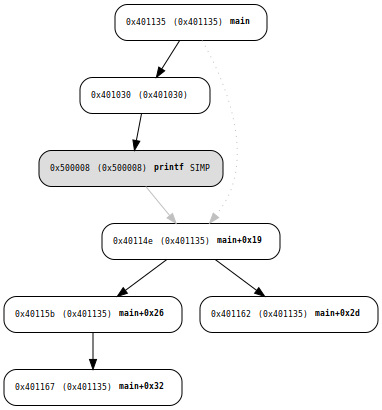

In [6]:
s = Source.from_file('./hello.raw')
s

<class 'pydotplus.graphviz.Dot'>
<class 'networkx.classes.multidigraph.MultiDiGraph'>


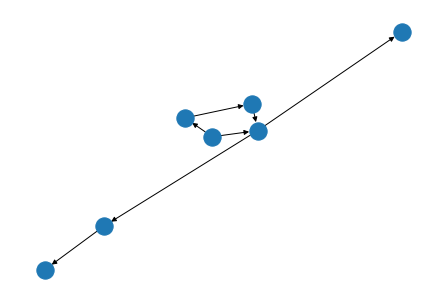

In [13]:
import pydotplus

dotplus = pydotplus.graph_from_dot_data(s.source)
print(type(dotplus)) #  <class 'pydotplus.graphviz.Dot'>
nx_graph = nx.nx_pydot.from_pydot(dotplus)
print(type(nx_graph)) # <class 'networkx.classes.multidigraph.MultiDiGraph'>
# multigraph->graph = dotplus.set_strict(true)
nx.draw(nx_graph)